In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [6]:
import streamlit as st
import pandas as pd

In [28]:
df = pd.read_csv('vehicles_us.csv')
df = df.drop(df.columns[0],axis=1)

In [30]:
df.head()

,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [29]:
df.shape

(51525, 12)

In [12]:
st.header('Market for used cars')
st.write("""##### Filtering data below to see the add by model""")
show_new_cars = st.checkbox('Include new cars from dealers')

show_new_cars

False

In [13]:
if not show_new_cars:
    df = df[df.condition!='good']

In [14]:
#creating options for filter for all manufacturers 
manufacturer_choice = df['model'].unique()
users_choice = st.selectbox('Select model:',manufacturer_choice)

In [15]:
manufacturer_choice

array(['hyundai sonata', 'ford f-150', 'chrysler 200', 'chrysler 300',
       'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'chevrolet silverado',
       'chevrolet malibu', 'ford fusion se', 'chevrolet impala',
       'chevrolet corvette', 'toyota camry le', 'nissan altima',
       'subaru outback', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v', 'dodge charger',
       'ford focus', 'honda civic', 'chevrolet colorado',
       'jeep grand cherokee', 'chevrolet cruze', 'bmw x5', 'ford mustang',
       'subaru impreza', 'toyota 4runner', 'nissan versa', 'toyota rav4',
       'subaru forester', 'ford f150', 'chevrolet suburban',
       'jeep wrangler', 'ford expedition', 'dodge grand caravan',
       'ford taurus', 'kia soul', 'gmc sierra', 'toyota tacoma',
       'ford escape'

In [16]:
users_choice

'hyundai sonata'

In [17]:
#next let's create slider for a year, users can filter the cars by year
#creating min and max years limits for our slider
min_year, max_year = int(df['model_year'].min()), int(df['model_year'].max())
#creating slider
year_range = st.slider("Choose years",
                       value=(min_year, max_year),min_value=min_year,max_value=max_year)

In [19]:
year_range

(1908, 2019)

In [20]:
#filtering dataset from chosen model and chosen year
filtered_type = df[(df.model==users_choice) & (df.model_year >= year_range[0]) & (df.model_year <= year_range[1])]

In [21]:
#showing the final table in streamlit
st.table(filtered_type)

DeltaGenerator()

In [22]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73


In [23]:
st.header('Price analysis')
st.write("""###### Let's analyze what price influences the most. We'll check how distribution of price varies depending on 
transmission,cylinders,fuel and type""")

In [24]:
import plotly.express as px

#creating histogram plot from list of options
list_for_hist = ['transmission','cylinders','fuel','type']

#creating selectbox
choice_for_hist = st.selectbox('Split for price distribution', list_for_hist)

#plotly histogram price is split by choice made in the selectbox
fig1 = px.histogram(df, x='price', color=choice_for_hist)

#adding title
fig1.update_layout(title="<b> Split of price by {}</b>".format(choice_for_hist))
#into streamlit
st.plotly_chart(fig1)

DeltaGenerator()

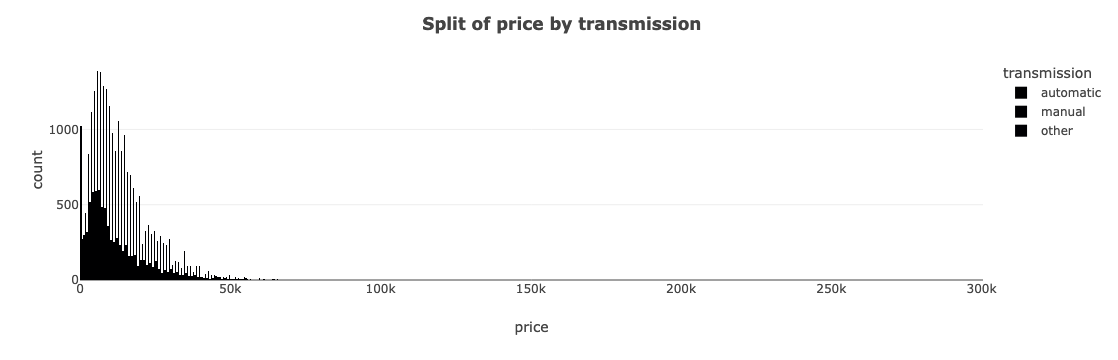

In [25]:
fig1.show()

In [26]:
st.write("""
##### Now Let's check how price is affected by odometer,paint_type,is_4wd in the adds""")

#Distribution of price depending odometer,paint_type and is_4wd
list_for_scatter = ['odometer','paint_type','is_4wd']
choice_for_scatter = st.selectbox('Price dependency on',list_for_scatter)
fig2 = px.scatter(df, x='price', y=choice_for_scatter, hover_data=['model_year'])

fig2.update_layout(title="<b> Price vs {}</b>".format(choice_for_scatter))
st.plotly_chart(fig2)


DeltaGenerator()

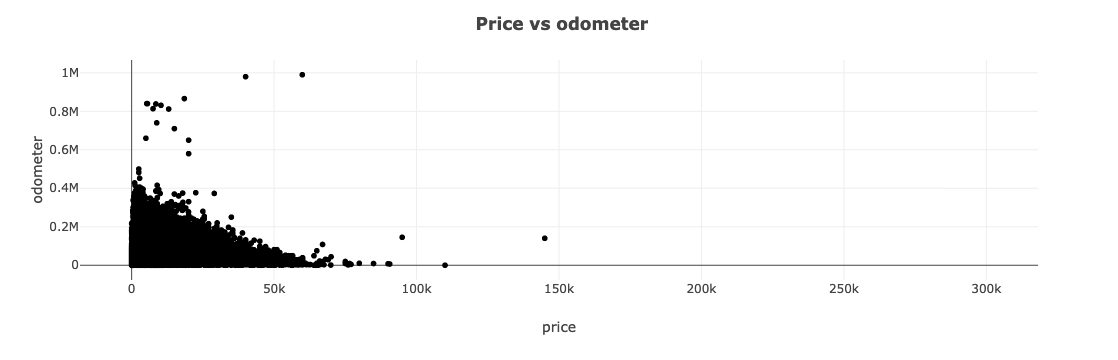

In [27]:
fig2.show()